## CH.4 모델훈련

### 4.1 선형회귀(가장 간단한 모델)

- 선형 회귀 모델

  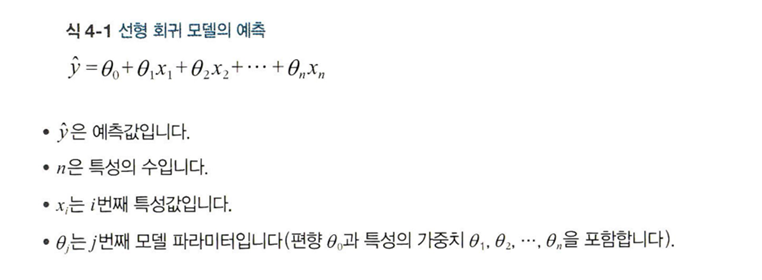


- '모델 훈련'은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

- 이를 위해서는 모델이 훈련 세트에 얼마나 잘 들어맞는지 측정해야 함

### 4.1.1 정규방정식

- 정규방정식

  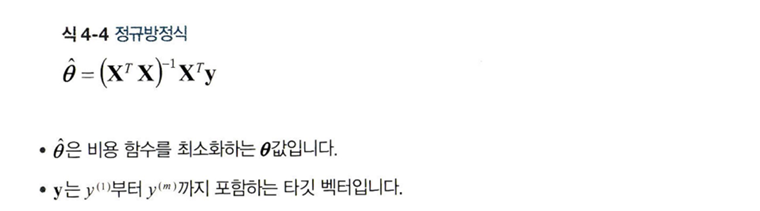

- 비용 함수를 최소화하는 θ값을 찾기 위한 해석적인 방법(결과를 바로 얻을 수 있음)

### 4.1.2 계산 복잡도

- 정규방정식과 SVD 방법 모두 특성 수가 많아지면 매우 느려짐

- 훈련 세트의 샘플 수에 대해서는 선형적으로 증가함

- 학습된 선형 회귀 모델의 예측 계산 복잡도는 샘플 수와 특성 수에 선형적임

In [28]:
import numpy as  np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [29]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 Xθ = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [30]:
theta_best

array([[4.08676457],
       [2.97389933]])

In [31]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 Xθ = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.08676457],
       [10.03456323]])

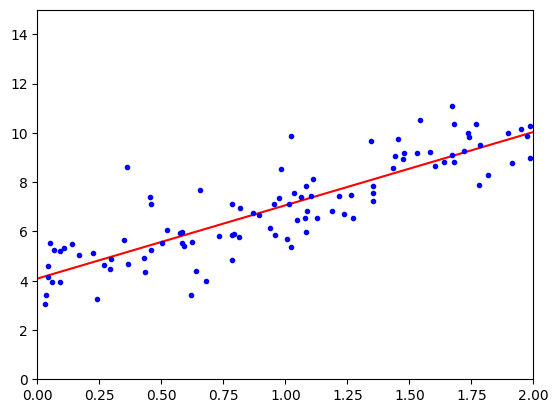

In [32]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([4.08676457]), array([[2.97389933]]))

In [35]:
lin_reg.predict(X_new)

array([[ 4.08676457],
       [10.03456323]])

In [36]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08676457],
       [2.97389933]])

In [37]:
np.linalg.pinv(X_b).dot(y)

array([[4.08676457],
       [2.97389933]])

< 특잇값 분해(SVD) >

- 특잇값 분해는 행렬을 3개의 특별한 행렬의 곱으로 분해하는 강력한 선형대수 기법

< 유사역행렬 >

- 유사역행렬은 항상 구할 수 있기 때문에, 행렬의 역행렬이 없는 경우 유용하게 쓰임

### 4.2 경사 하강법

- 기본 아이디어: 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- 그래디언트가 감소하다가 0이 되면 최솟값에 도달한 것임

- 중요 파라미터: **학습률(스텝의 크기)**

- 선형 회귀를 위한 MSE 비용 함수는 볼록 함수로, 하나의 전역 최솟값만 존재함

- 주의점: 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 해야 함

### 4.2.1 배치 경사 하강법

- 편도함수: 모델 파라미터가 조금 변경될 때 비용 함수가 얼마나 바뀌는 지 계산하는 것

- 비용 함수의 편도함수

  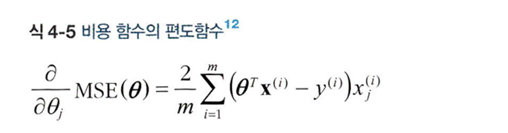

- 배치 경사 하강법: 매 경사 하강법 스텝에서 전체 훈련 세트에 대해 계산함

- 따라서, 매우 큰 훈련 세트에서는 아주 느리지만 특성 수에는 민감하지 않음

- **그리드 탐색**: 적절한 학습률을 찾기 위한 방법

- 이때, 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면 알고리즘을 중지하게 함

### 4.2.2 확률적 경사 하강법

- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산함

- 학습률을 점진적으로 감소시킴(처음에는 크게하고 점차 작게 줄임)

### 4.2.3 미니배치 경사 하강법

- 각 스텝에서 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산함

- 정규방정식은 선형 회귀만을 위한 알고리즘이지만 경사 하강법 알고리즘은 여러 가지 다른 모델도 훈련 시킬 수 있음



In [38]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [39]:
theta

array([[4.08676457],
       [2.97389933]])

In [40]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t): # 매 반복에서 학습률을 결정하는 함수
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [41]:
theta

array([[4.0550693 ],
       [2.94703603]])

In [42]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [43]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1108783]), array([2.9961513]))

### 4.3 다항 회귀

- 다항 회귀: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것



In [44]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.50615631])

In [46]:
X_poly[0]

array([-1.50615631,  2.26850683])

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.79956209]), array([[1.1026194 , 0.58356633]]))

### 4.4 학습 곡선

< 모델의 일반화 성능을 추정하는 방법 >

1. 교차 검증: 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘면 모델이 과대적합, 양쪽에 모두 좋지 않으면 과소적합

2. 학습 곡선:훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

< 편향/분산 트레이드오프>

- 편향: 잘못된 가정으로 인한 오차, 예를 들어 실제로 2차인 데이터를 선형으로 가정하는 경우에 발생

- 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움

- 분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남

- 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듦

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

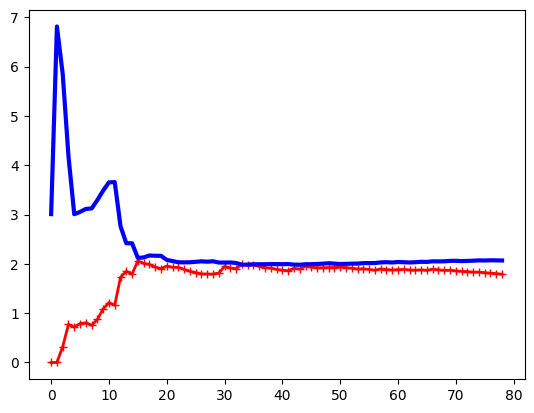

In [49]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

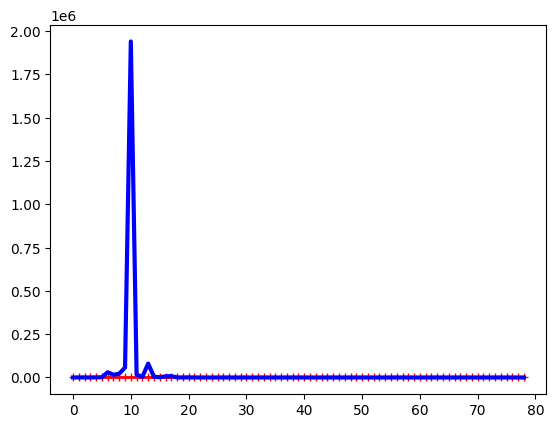

In [50]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)